# Introdução Scikit-Learn

Vamos ver um exemplo do fluxo treinamento [``fit()``] e predição [``predict()``].

Iremos produzir um modelo usando Regressãão Linear. Neste momento, não se preocupe em entender como o algoritmo funciona neste momento.

### Gerando dados fictícios

Iremos gerar exemplos com apenas uma feature e seus respectivos valores previstos. Você pode imaginar, por exemplo, que cada valor de x corresponde ao comprimento de um palmo de uma pessoa e cada valor de y corresponde ao comprimento do braço da mesma pessoa.

Os dados gerados seguem uma tendência (linear), pois está sendo gerado a partir de uma funcao linear f(x) = ax+b. Neste cóódigo x assume valores entre 0 e 10 e y assume valores que são um pouco mais ou um pouco menos que 2 * x.

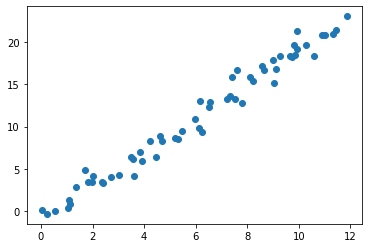

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(10)
x = 12 * rng.rand(60)
y = 2 * x - 1 + rng.randn(60)
plt.scatter(x, y);

Vamos dar uma olhada o que acontece ao usar rand(..) e randn(..)

In [ ]:
rng.rand(60)

array([0.14762019, 0.18403482, 0.64507213, 0.04862801, 0.24861251,
       0.54240852, 0.22677334, 0.38141153, 0.92223279, 0.92535687,
       0.56674992, 0.53347088, 0.01486002, 0.97789926, 0.5730289 ,
       0.791757  , 0.56155736, 0.87733524, 0.58419583, 0.70884983,
       0.14853345, 0.42845074, 0.69389007, 0.10461974, 0.43960524,
       0.16620215, 0.50697863, 0.81903586, 0.09010673, 0.80006875,
       0.56512635, 0.58934771, 0.19810066, 0.43611826, 0.29590376,
       0.03755768, 0.03068484, 0.453105  , 0.74486408, 0.55729541,
       0.3851136 , 0.1680728 , 0.83826132, 0.5990518 , 0.78271482,
       0.84850918, 0.60316298, 0.78106062, 0.61573688, 0.02116519,
       0.75046461, 0.17604213, 0.45851421, 0.51312271, 0.48402089,
       0.84438579, 0.17481389, 0.01463488, 0.84876407, 0.74267458])

In [ ]:
rng.randn(60)

array([-2.29510333, -1.19592931, -0.33310116, -0.79139077,  0.27417278,
       -0.51490992, -1.7110712 ,  0.61229731,  1.10012937,  0.56435253,
       -0.71279944, -0.26085948,  0.54842807,  0.60319905,  1.00686114,
       -0.29442601, -1.42088052, -0.67894677,  0.53388481,  0.7439744 ,
        2.22504964,  0.11718142,  0.24461452, -0.17729882, -0.40572953,
        0.78177519,  0.35347761, -0.20727949, -1.07969738, -0.12306983,
       -0.39098219,  1.25517373,  0.94712608, -1.02231069,  1.16716837,
       -0.57197681,  0.1331375 ,  1.20274387, -1.02475297,  0.16039916,
       -1.13047529, -1.94129968,  0.98659782,  0.02822737, -0.8223676 ,
       -1.58655176, -0.40147282,  1.34217928,  0.40246909, -0.37276142,
       -0.67202344,  0.10581208, -1.54730539,  1.34480651,  0.50318918,
        1.1943506 , -0.56350567,  0.85482876,  0.68790473, -1.53306872])

### Gerando o Modelo

Escolhendo a classe do modelo

In [ ]:
from sklearn.linear_model import LinearRegression

Instanciando o modelo

In [ ]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Observe que X não está no formato que precisamos [n_samples, n_features]. O vetor y já está OK.

In [ ]:
x.shape

(60,)

Vamos então fazer o reshape X para manter no formato [n_samples, n_features]

In [ ]:
X = x[:, np.newaxis]
X.shape #apos o reshape

(60, 1)

Executando o método fit() para realizar o treinamento do modelo

In [ ]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Inspecionando o modelo gerado

Vamos inspecionar alguns atributos específicos do modelo (slope e intercept).

Esses dois parâmetros representam a inclinação e a interceptação da regressão linear.

Vemos que eles estão bem próximos do que especificamos ao 'fabricar' os dados.

In [ ]:
model.coef_

array([1.97649776])

In [ ]:
model.intercept_

-0.831156676505941

#### Realizando previsões com dados desconhecidos

Vamos começar fazendo uma única predição.

Experimente alguns valores diferentes e perceba que y será um pouco mais ou um pouco menos do que 2 * x

In [ ]:
model.predict([[12.0]])

array([22.8868165])

Agora vamos avaliar nosso preditor para um conjunto maior de dados. Para fins deste exemplo, nossos "novos dados" serão um vetor de valores *x* e perguntaremos quais valores *y* o modelo prevê:

In [ ]:
xfit = np.linspace(-1, 13) #gera numeros bem distribuidos entre -1 e 13
xfit

array([-1.        , -0.71428571, -0.42857143, -0.14285714,  0.14285714,
        0.42857143,  0.71428571,  1.        ,  1.28571429,  1.57142857,
        1.85714286,  2.14285714,  2.42857143,  2.71428571,  3.        ,
        3.28571429,  3.57142857,  3.85714286,  4.14285714,  4.42857143,
        4.71428571,  5.        ,  5.28571429,  5.57142857,  5.85714286,
        6.14285714,  6.42857143,  6.71428571,  7.        ,  7.28571429,
        7.57142857,  7.85714286,  8.14285714,  8.42857143,  8.71428571,
        9.        ,  9.28571429,  9.57142857,  9.85714286, 10.14285714,
       10.42857143, 10.71428571, 11.        , 11.28571429, 11.57142857,
       11.85714286, 12.14285714, 12.42857143, 12.71428571, 13.        ])

Os valores de *xfit* precisam estar em uma matriz ``[n_samples, n_features]``. Vamos fazer o reshape de *xfit* e armazenar o resultado em *Xfit*.

In [ ]:
Xfit = xfit[:, np.newaxis]
#yfit = model.predict(Xfit)

Fazendo a previsao com o metodo predict()

In [ ]:
yfit = model.predict(Xfit)

Por fim, vamos visualizar os resultados plotando primeiro os dados brutos e, em seguida, os dados previstos pelo modelo.

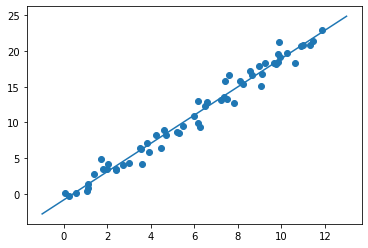

In [ ]:
plt.scatter(x, y) #dados brutos
plt.plot(xfit, yfit); #valores preditos

## Carregando um dataset com sklearn.datasets

Não utilizaremos estes dados neste exercício. Isto é apenas para ilustrar como podemos carregar datasets prontos oferecidos pelo scikit.

No próximo exercício, iremos treinar um modelo usando um dataset carregado desta maneira.

### Carregando o dataset

In [ ]:
from sklearn.datasets import load_iris

irisds = load_iris() #sklearn.utils.Bunch

### Exibindo os exemplos (valores das features)

In [ ]:
irisds.data #numpy.ndarray

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Exibindo os nomes das features

In [ ]:
irisds.feature_names #list

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### Exibindo os valores dos rótulos



In [ ]:
irisds.target #numpy.ndarray

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Exibindo os nomes dos rótulos



In [ ]:
irisds.target_names #numpy.ndarray

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')